In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import geopandas 

In [28]:
gt = geopandas.read_file("dataset/gtm_adm_ocha_conred_2019_SHP/gtm_admbnda_adm2_ocha_conred_20190207.shp")
gt.ADM2_PCODE = gt.ADM2_PCODE.map(lambda x: int(x[2:]))
gt = gt[["ADM2_PCODE", "geometry", "ADM2_ES", "ADM1_ES"]]
gt.head()

,ADM2_PCODE,geometry,ADM2_ES,ADM1_ES
0,411,"POLYGON ((-90.96027 14.59634, -90.95620 14.594...",Acatenango,Chimaltenango
1,2204,"POLYGON ((-89.54702 14.51849, -89.54562 14.518...",Agua Blanca,Jutiapa
2,1327,"POLYGON ((-91.17128 15.38646, -91.16989 15.384...",Aguacatán,Huehuetenango
3,913,"POLYGON ((-91.46098 14.82363, -91.46459 14.820...",Almolonga,Quetzaltenango
4,314,"POLYGON ((-90.81634 14.49698, -90.81160 14.495...",Alotenango,Sacatepéquez


In [80]:
gt_lgbm = pd.read_csv("results_lgbm.csv")
gt_lgbm["mape"] = np.abs(gt_lgbm.vim - gt_lgbm.pred) / gt_lgbm.vim * 100
gt_lgbm = gt_lgbm.groupby("ADM2_PCODE")["mape"].mean().reset_index()

gt_lgbm = gt.merge(gt_lgbm, on="ADM2_PCODE", how="right")

gt_lgbm.head(15)

,ADM2_PCODE,geometry,ADM2_ES,ADM1_ES,mape
0,100,"POLYGON ((-90.57681 14.48754, -90.57627 14.487...",Lago De Amatitlan,Guatemala,2.452208
1,101,"POLYGON ((-90.39104 14.61984, -90.39576 14.619...",Guatemala,Guatemala,2.861419
2,102,"POLYGON ((-90.42939 14.54704, -90.43163 14.544...",Santa Catarina Pinula,Guatemala,1.682849
3,103,"POLYGON ((-90.23677 14.60925, -90.23710 14.606...",San José Pinula,Guatemala,0.879244
4,104,"POLYGON ((-90.32719 14.81303, -90.32796 14.812...",San José del Golfo,Guatemala,3.310022
5,105,"POLYGON ((-90.33191 14.73266, -90.33126 14.731...",Palencia,Guatemala,1.264114
6,106,"POLYGON ((-90.45189 14.70592, -90.45215 14.705...",Chinautla,Guatemala,1.712232
7,107,"POLYGON ((-90.42437 14.82535, -90.42405 14.824...",San Pedro Ayampuc,Guatemala,1.932974
8,108,"POLYGON ((-90.52505 14.70749, -90.52497 14.703...",Mixco,Guatemala,2.998114
9,109,"POLYGON ((-90.53698 14.70981, -90.54326 14.705...",San Pedro Sacatepéquez,Guatemala,1.794452


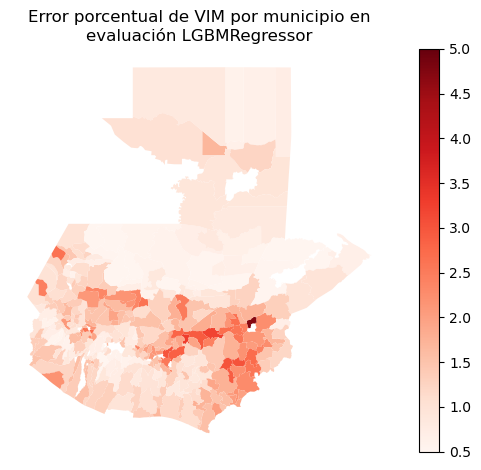

In [81]:
gt_lgbm.plot(column="mape", legend=True, cmap="Reds", vmin=0.5, vmax=5)
plt.axis("off")
plt.title("Error porcentual de VIM por municipio en\nevaluación LGBMRegressor")
plt.tight_layout()

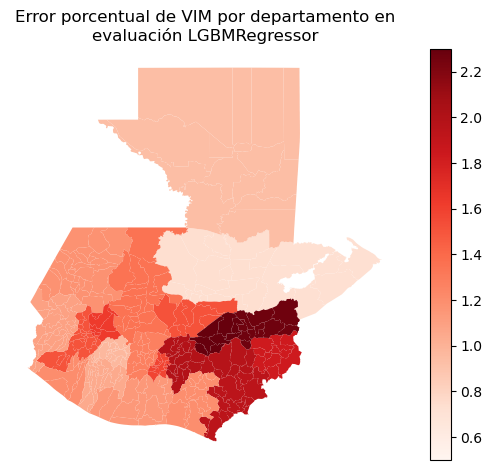

In [82]:
gt_lgbm = gt_lgbm.groupby("ADM1_ES")["mape"].mean().reset_index()
gt_lgbm = gt.merge(gt_lgbm, on="ADM1_ES", how="right")
gt_lgbm.plot(column="mape", legend=True, cmap="Reds", vmin=0.5, vmax=2.3)
plt.axis("off")
plt.title("Error porcentual de VIM por departamento en\nevaluación LGBMRegressor")
plt.tight_layout()

In [83]:
gt_lstm = pd.read_csv("results_lstm.csv")
gt_lstm["mape"] = np.abs(gt_lstm.vim - gt_lstm.pred) / gt_lstm.vim * 100
gt_lstm = gt_lstm.groupby("ADM2_PCODE")["mape"].mean().reset_index()

gt_lstm = gt.merge(gt_lstm, on="ADM2_PCODE", how="right")

gt_lstm.head(15)

,ADM2_PCODE,geometry,ADM2_ES,ADM1_ES,mape
0,100,"POLYGON ((-90.57681 14.48754, -90.57627 14.487...",Lago De Amatitlan,Guatemala,1.702316
1,101,"POLYGON ((-90.39104 14.61984, -90.39576 14.619...",Guatemala,Guatemala,1.346907
2,102,"POLYGON ((-90.42939 14.54704, -90.43163 14.544...",Santa Catarina Pinula,Guatemala,0.884966
3,103,"POLYGON ((-90.23677 14.60925, -90.23710 14.606...",San José Pinula,Guatemala,0.482223
4,104,"POLYGON ((-90.32719 14.81303, -90.32796 14.812...",San José del Golfo,Guatemala,2.494214
5,105,"POLYGON ((-90.33191 14.73266, -90.33126 14.731...",Palencia,Guatemala,0.825727
6,106,"POLYGON ((-90.45189 14.70592, -90.45215 14.705...",Chinautla,Guatemala,0.794465
7,107,"POLYGON ((-90.42437 14.82535, -90.42405 14.824...",San Pedro Ayampuc,Guatemala,1.349846
8,108,"POLYGON ((-90.52505 14.70749, -90.52497 14.703...",Mixco,Guatemala,1.192276
9,109,"POLYGON ((-90.53698 14.70981, -90.54326 14.705...",San Pedro Sacatepéquez,Guatemala,0.781221


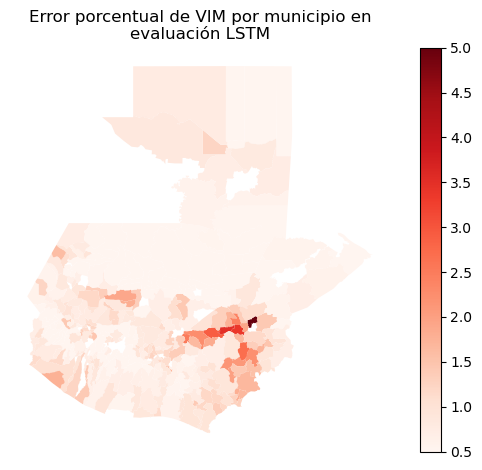

In [84]:
gt_lstm.plot(column="mape", legend=True, cmap="Reds", vmin=0.5, vmax=5)
plt.axis("off")
plt.title("Error porcentual de VIM por municipio en\nevaluación LSTM")
plt.tight_layout()

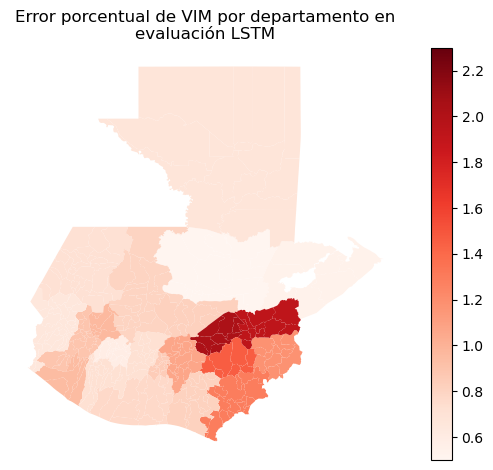

In [85]:
gt_lstm = gt_lstm.groupby("ADM1_ES")["mape"].mean().reset_index()
gt_lstm = gt.merge(gt_lstm, on="ADM1_ES", how="right")
gt_lstm.plot(column="mape", legend=True, cmap="Reds", vmin=0.5, vmax=2.3)
plt.axis("off")
plt.title("Error porcentual de VIM por departamento en\nevaluación LSTM")
plt.tight_layout()